In [3]:
# coding: utf-8
import sys
import os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer

In [4]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 결과를 빠르게 얻기 위해 훈련 데이터를 줄임
x_train = x_train[:500]
t_train = t_train[:500]

In [5]:
# 하이퍼파라미터 튜닝에는 테스트셋을 사용해서는 안되기 때문에, validation dataset을 따로 설정하여 튜닝한다.
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]

In [6]:
def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784,
                            hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd',
                      optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list

In [7]:
# 하이퍼파라미터 무작위 탐색

optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 탐색한 하이퍼파라미터의 범위 지정===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

val acc:0.82 | lr:0.008985007173686074, weight decay:1.685374596051109e-06
val acc:0.09 | lr:8.634613071867112e-05, weight decay:9.357295260010747e-05
val acc:0.16 | lr:1.4844322215478563e-06, weight decay:9.798337670848944e-06
val acc:0.19 | lr:0.0012202654139384563, weight decay:2.717118033290738e-07
val acc:0.1 | lr:8.458627596743132e-06, weight decay:1.4585014749200437e-08
val acc:0.15 | lr:5.857724632226944e-06, weight decay:3.2363927642011437e-06
val acc:0.46 | lr:0.003715396975531421, weight decay:1.760032917268814e-05
val acc:0.04 | lr:1.8088899451008592e-06, weight decay:5.543381971812517e-07
val acc:0.58 | lr:0.0030768311904429244, weight decay:6.803540236819894e-05
val acc:0.68 | lr:0.004542980995458488, weight decay:3.5010602219246264e-05
val acc:0.26 | lr:0.001225034440071728, weight decay:2.3754485922131122e-05
val acc:0.05 | lr:4.238380365762669e-06, weight decay:2.5527822170063064e-05
val acc:0.31 | lr:0.0008470748421040982, weight decay:3.185509643105811e-08
val acc:0.

=========== Hyper-Parameter Optimization Result ===========
Best-1(val acc:0.82) | lr:0.008985007173686074, weight decay:1.685374596051109e-06
Best-2(val acc:0.77) | lr:0.006494321205443838, weight decay:2.1722167368349492e-05
Best-3(val acc:0.68) | lr:0.004542980995458488, weight decay:3.5010602219246264e-05
Best-4(val acc:0.58) | lr:0.0030768311904429244, weight decay:6.803540236819894e-05
Best-5(val acc:0.53) | lr:0.0036960909455140056, weight decay:7.742408575684171e-06
Best-6(val acc:0.53) | lr:0.002563362820979984, weight decay:1.3480875379002923e-08
Best-7(val acc:0.46) | lr:0.003715396975531421, weight decay:1.760032917268814e-05
Best-8(val acc:0.44) | lr:0.0021603393164884004, weight decay:8.954683148676083e-08
Best-9(val acc:0.4) | lr:0.001456634442859514, weight decay:1.3701375781596022e-05
Best-10(val acc:0.4) | lr:0.0023059072795831156, weight decay:1.4571967437658206e-08
Best-11(val acc:0.39) | lr:0.0016529885326517647, weight decay:2.7765892413826135e-05
Best-12(val acc:

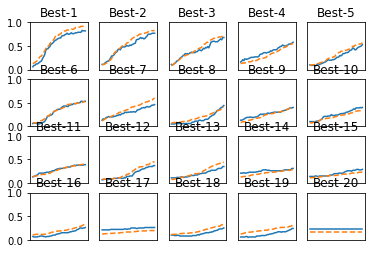

In [8]:
# 그래프 그리기

print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x: x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5:
        plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()